In [1]:
from keras.models import load_model
from time import sleep
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array, array_to_img
import cv2
import numpy as np


In [2]:
#parameters
fruit_label = ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana',
               'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn',
               'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White',
               'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green',
               'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry',
               'Strawberry', 'Tomato', 'Watermelon']
image_size = 128
classifier = load_model("mobilenet_model_newdata.h5")
print(len(fruit_label))

33


# CV2 test section

In [3]:
cap = cv2.VideoCapture(0)
while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(image_size,image_size))
    img/255
    img = img.reshape(1,image_size,image_size,3)
    cv2.imshow('Fruit Detector',imgOriginal)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        save_img = img
        break
cap.release()
cv2.destroyAllWindows()

note the images in plt.imshow() has its color palett change to RBG from CV2 original BRG
see image in Results/cv2 utan cvt color change.png

[[[0.49803922 0.51764706 0.47843137]
  [0.49019608 0.50980392 0.4627451 ]
  [0.48627451 0.50980392 0.45882353]
  ...
  [0.5254902  0.59607843 0.62352941]
  [0.51764706 0.59215686 0.62745098]
  [0.51372549 0.58823529 0.63529412]]

 [[0.48235294 0.51764706 0.49019608]
  [0.48627451 0.51764706 0.47843137]
  [0.49411765 0.51372549 0.4745098 ]
  ...
  [0.5254902  0.6        0.65098039]
  [0.52156863 0.59607843 0.65098039]
  [0.51372549 0.59607843 0.61176471]]

 [[0.49411765 0.51372549 0.46666667]
  [0.49411765 0.51372549 0.4745098 ]
  [0.49411765 0.51372549 0.47058824]
  ...
  [0.52941176 0.60784314 0.63529412]
  [0.5372549  0.60784314 0.62745098]
  [0.52156863 0.60784314 0.64313725]]

 ...

 [[0.50980392 0.52941176 0.50588235]
  [0.51372549 0.53333333 0.52941176]
  [0.50980392 0.52941176 0.5254902 ]
  ...
  [0.57647059 0.61960784 0.63137255]
  [0.58039216 0.62745098 0.62352941]
  [0.57254902 0.62745098 0.63137255]]

 [[0.49803922 0.53333333 0.51764706]
  [0.51372549 0.53333333 0.51764706]


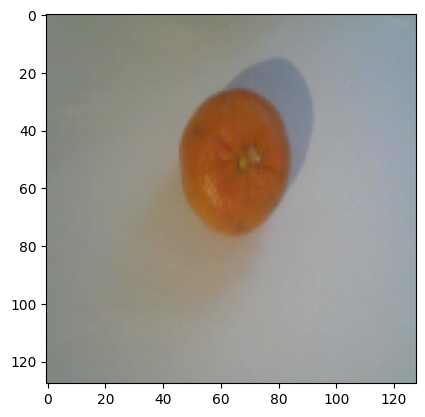

In [29]:
#print(save_img)
color_ch = cv2.cvtColor(save_img.reshape(image_size,image_size,3),cv2.COLOR_BGR2RGB)/255
print(color_ch)
scaled_saved_img = save_img/255
plt.imshow(colorch)
#plt.imshow(save_img.reshape(image_size,image_size,3))

In [3]:
cap = cv2.VideoCapture(0)



while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img = cv2.resize(img,(image_size,image_size))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img/255
    img = img.reshape(1,image_size,image_size,3)
    #Printing the each class to the screen
    #### PREDICT
    predictions = classifier.predict(img)
    probVal= np.amax(predictions)
    label=fruit_label[predictions.argmax()]
    print(label,probVal)
     
    if probVal> 0.3:
        cv2.putText(imgOriginal,str(label) + "   "+str(probVal),
                    (50,50),cv2.FONT_HERSHEY_COMPLEX,
                    1,(0,0,255),1)   

        
    cv2.imshow('Fruit Detector',imgOriginal)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 7s 7s/step
Pepper Green 0.60991573
1/1 [==============================] - 0s 26ms/step
Pepper Green 0.581397
1/1 [==============================] - 0s 28ms/step
Pepper Green 0.56177986
1/1 [==============================] - 0s 24ms/step
Pepper Green 0.5733196
1/1 [==============================] - 0s 28ms/step
Pepper Green 0.53089225
1/1 [==============================] - 0s 28ms/step
Pepper Green 0.68107855
1/1 [==============================] - 0s 33ms/step
Pepper Green 0.5952782
1/1 [==============================] - 0s 22ms/step
Pepper Green 0.6141347
1/1 [==============================] - 0s 33ms/step
Pepper Green 0.68297195
1/1 [==============================] - 0s 22ms/step
Pepper Green 0.61852425
1/1 [==============================] - 0s 21ms/step
Pepper Green 0.6185705
1/1 [==============================] - 0s 21ms/step
Pepper Green 0.70339143
1/1 [==============================] - 0s 21ms/step
Pepper Green 0.70339143
1/1 [===============

Feel free to run the script with the model and try it.
A white background is not needed but will help the model.
See screenshot clementine with and without white background

Notes: Though the new dataset seems to preform better. it still has some difficulties with some fruits.
It seems as tho colors rather than shape have a huge impact on detection. such as red apple being predicted as red fruits
such as tomatos, strawberries etc, and green apples being predicted as pears or cantaloupes.
clementines seems to perfrom well and seems to have a stronger weight than oranges, but on test it is possible
for the model to destinguies them.

cantaloupe and corn seems to be 2 strong bias, despite corn being such a unique shape and color to others,
there seems to be a lot of wrong predictions, for example a kiwi being predicted as corn or canteloupe

despite some awful predictions we get some right. the model might need to be retrained or adjusted or simply we need to find another dataset.

The first dataset provided even worse results and looking in to the data we have a lot of useless data
see ref: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition?select=test
for example look at the apple pictures and you will find an apple logo.

the new much simpler dataset, see ref: https://www.kaggle.com/datasets/sshikamaru/fruit-recognition/data
The data is much simpler which might make it easier for the model to predict the live fruits.
other datasets might perform better, rather than trying to change the model.
The con of using this dataset is that the training data had to be split into val and train making the model accuracy when training seem bias.
The test set of the dataset is unlabeled making them hard to use as validation. though it is possible for the model to predict on the test images and manually check accuarcy.

Note that the mobilenet model needed to have an input of certain criteria such as [96, 128, 160, 192, 224]
the dataset was made for 100x100 images, so the pictures had to be scaled up which might have provided the model with "blurry" images.

it is also worth noting that this cv main does not include a cascade classifier which makes it difficult for the images to be concentrated on the object (fruit) which is why test where done with a white paper background for the real life items.

For example look at the image in the results folder named: live clementine w black background.note light reflecting, read notes in main. By not using a whitepaper as a background the clementine seems to reflect more light making the model predict potato red which might make the model think the fruit is more red than it actually is. Proper lighting might be needed for the model perform better as it is very sensitive to colors.

other items where projected from a simple screen with pictures of fruit taken from google.
This seemed resonable but might have given the results a bias.

It should be noted that the convertion from cv2 into a format that the model can predict might be wrong.
some changes have been implemented for the images to look like they should have.
Such as converting the cv2 default setting of BRG pallets into RBG pallets so that the images have the right colors for the model
If you look at cell nr4 the images from the test cv2 provides an image with the right color when converted from BRG to RBG and if you look at the images in the results folder you will find a picture without the RBG convertion making the color red/orange look blue instead
but other aspects that were unnoticed might have slipped through making the model predict wrong.

Moving forward: If i were to make another simular project i would definetly look for better datasets or maybe providing my own.
Object detection would probably help the model focus on the object and significantly improved results.